## Session 12 - PyTorch Lightning & Gradio

### Import modules

In [2]:
import torch
import torch.nn as nn
import lightning as L
import torchvision
from lightning.pytorch.tuner import Tuner

In [3]:
# Import user defined modules
from models.resnet_lightning import ResNet
from utils.data import CIFARDataModule
from utils.config import config
from utils.common import get_misclassified_data, plot_misclassified
from utils.gradcam import plot_gradcam

### Import the Datamodule & Initialize

In [6]:
datamodule = CIFARDataModule()
datamodule.setup()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### Configuration Parameters

In [7]:
batch_size = config.data.batch_size
shuffle = config.data.shuffle
num_workers = config.data.num_workers
learning_rate = config.training.lr
scheduler_steps = len(datamodule.train_dataloader())
maxlr = learning_rate
epochs = config.training.epochs

### Initialize Model & Trainer

In [8]:
model = ResNet(
    batch_size=batch_size,
    shuffle=shuffle,
    num_workers=num_workers,
    learning_rate=learning_rate,
    scheduler_steps=scheduler_steps,
    maxlr=maxlr,
    epochs=epochs,
)

trainer = L.Trainer(accelerator="gpu", devices=[0], num_nodes=1, max_epochs=epochs)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


### Find the best learning rate

You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\Shubham\anaconda3\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
C:\Users\Shubham\anaconda3\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
C:\Users\Shubham\anaconda3\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.000363078054770101
Restoring states from the checkpoint path at C:\Users\Shubham\Documents\ERA\ERA Session-13\.lr_find_5acf1688-6f70-4d83-82a3-507c4289d65a.ckpt
Restored all states from the checkpoint at C:\Users\Shubham\Documents\ERA\ERA Session-13\.lr_find_5acf1688-6f70-4d83-82a3-507c4289d65a.ckpt


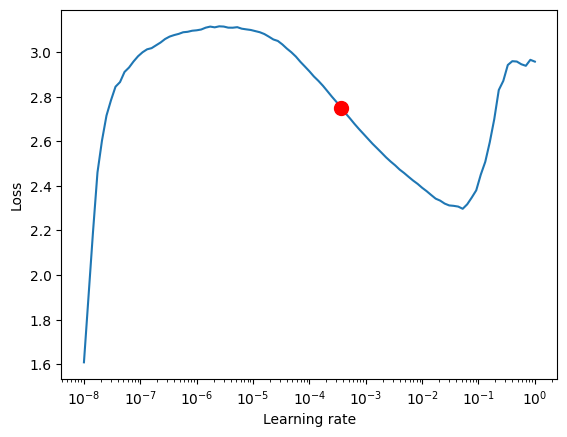

In [6]:
tuner = Tuner(trainer)

lr_finder = tuner.lr_find(model=model, datamodule=datamodule)
maxlr = lr_finder.suggestion()
fig = lr_finder.plot(suggest=True)

### Updated the optimum LR & Begin training

In [7]:
model.learning_rate = maxlr
model.maxlr = maxlr

trainer.fit(model, datamodule)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type               | Params
------------------------------------------------
0 | prep     | Sequential         | 1.9 K 
1 | layer1   | Sequential         | 369 K 
2 | layer2   | Sequential         | 295 K 
3 | layer3   | Sequential         | 5.9 M 
4 | pool     | MaxPool2d          | 0     
5 | fc       | Linear             | 5.1 K 
6 | softmax  | Softmax            | 0     
7 | accuracy | MulticlassAccuracy | 0     
------------------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.292    Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=20` reached.


### Testing 

In [8]:
trainer.test(model, datamodule)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\Shubham\anaconda3\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:492: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
C:\Users\Shubham\anaconda3\envs\myenv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing: |                                                                                       | 0/? [00:00<…

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9004999995231628
        test_loss            153.0028839111328
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 153.0028839111328, 'test_acc': 0.9004999995231628}]

In [9]:
%load_ext tensorboard
%tensorboard --logdir=lightning_logs/

### Save model

In [10]:
trainer.save_checkpoint("model.ckpt")

### Load Model

In [9]:
model = ResNet.load_from_checkpoint("model.ckpt")

### Get misclassified data & Plot

In [10]:
misclassified_data = get_misclassified_data(
    model, "cpu", datamodule.test_dataloader(), 10
)

In [11]:
inv_normalize = torchvision.transforms.Normalize(
    mean=[-0.50 / 0.23, -0.50 / 0.23, -0.50 / 0.23], std=[1 / 0.23, 1 / 0.23, 1 / 0.23]
)

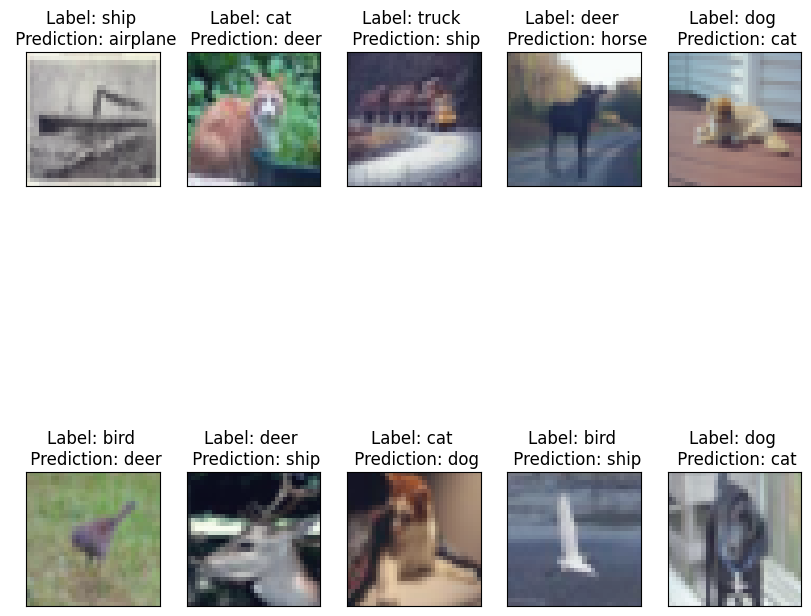

In [12]:
plot_misclassified(
    misclassified_data, datamodule.train_dataset.classes, inv_normalize=inv_normalize
)

### Generate Gradcam representation

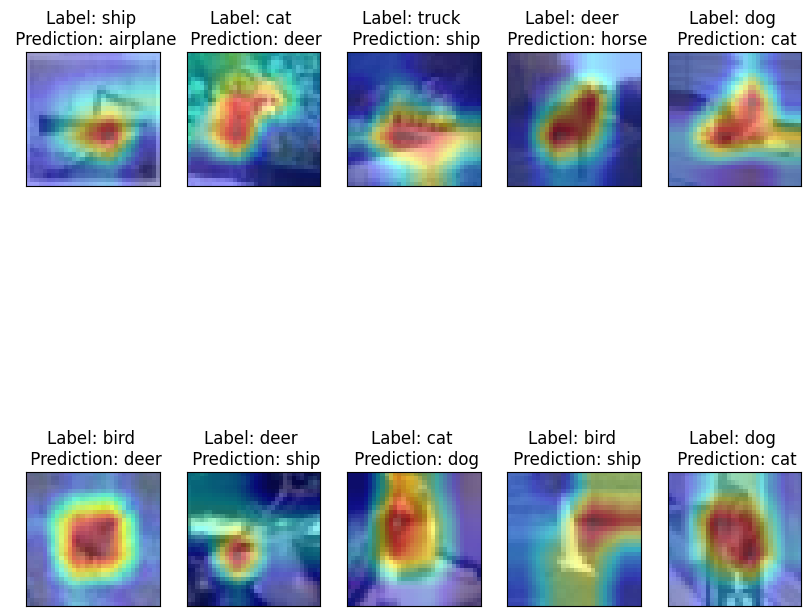

In [13]:
target_layers = [model.layer3[-1]]
targets = None
transparency = 0.60
number_of_samples = 10
data = misclassified_data
classes = datamodule.train_dataset.classes

plot_gradcam(model, data, classes, target_layers, 10, inv_normalize, cols=5)